# Prewitt edge detector: gradient filter és nonmaxima-suppression (NMS)

## Utils

In [ ]:
from PIL import Image, ImageOps
from matplotlib.image import imread
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np
import os

In [ ]:
def upload_file():
  uploaded = files.upload()
  os.remove(list(uploaded.keys())[0])
  for k, v in uploaded.items():
    open(k, 'wb').write(v)
  return list(uploaded.keys())[0]

In [ ]:
def read_image():
  image_name = upload_file()
  gray_image_name = f'gray_{image_name}'
  og_image = Image.open(image_name)
  grayscale_image = ImageOps.grayscale(og_image)
  grayscale_image.save(gray_image_name)
  grayscale_image = imread(gray_image_name)
  return og_image, grayscale_image

In [ ]:
def plot_images(image_1, image_2, image_3, first_gray=False):
  fig = plt.figure(1)
  fig.set_size_inches(18.5, 10.5)
  ax1, ax2, ax3 = fig.add_subplot(131), fig.add_subplot(132), fig.add_subplot(133)
  if first_gray:
      ax1.imshow(image_1, cmap="Greys_r")
  else:
    ax1.imshow(image_1)
  ax2.imshow(image_2, cmap="Greys_r")
  ax3.imshow(image_3, cmap="Greys_r")
  fig.show()

## Gradient Filter

In [ ]:
def apply_filter(grayscale_image, Gx, Gy):
  [rows, cols] = np.shape(grayscale_image) 
  filtered_image = np.zeros(shape=(rows, cols))
  gx_filterd = np.zeros(shape=(rows, cols))
  gy_filterd = np.zeros(shape=(rows, cols))

  for i in range(rows - 2):
      for j in range(cols - 2):
        # Cut 3*3 window from the image
          gx = np.sum(np.multiply(Gx, grayscale_image[i : i + 3, j : j + 3])) 
          gy = np.sum(np.multiply(Gy, grayscale_image[i : i + 3, j : j + 3]))
          gx_filterd[i : i + 3, j : j + 3] = gx
          gy_filterd[i : i + 3, j : j + 3] = gy
          
          # Gradient intensity
          filtered_image[i + 1, j + 1] = np.sqrt(gx**2 + gy**2)

  # Edge direction
  theta = np.arctan2(gx_filterd, gy_filterd)

  return grayscale_image, filtered_image, theta


## Non Max Suppression

In [ ]:
def non_max_suppression(gradient_img, direction):
    [rows, cols] = np.shape(gradient_img) 
    nms_image = np.zeros((rows,cols))
    angle = direction * 180. / np.pi
    angle[angle < 0] += 180
    
    for i in range(1,rows-1):
        for j in range(1,cols-1):
              a = 255
              b = 255
              
              if (157.5 <= angle[i,j] <= 180) or (0 <= angle[i,j] < 22.5):
                  a = gradient_img[i, j+1]
                  b = gradient_img[i, j-1]
              elif (22.5 <= angle[i,j] < 67.5):
                  a = gradient_img[i+1, j-1]
                  b = gradient_img[i-1, j+1]
              elif (67.5 <= angle[i,j] < 112.5):
                  a = gradient_img[i+1, j]
                  b = gradient_img[i-1, j]
              elif (112.5 <= angle[i,j] < 157.5):
                  a = gradient_img[i-1, j-1]
                  b = gradient_img[i+1, j+1]

              if (gradient_img[i,j] >= a) and (gradient_img[i,j] >= b):
                  nms_image[i,j] = gradient_img[i,j]
              else:
                  nms_image[i,j] = 0
    return nms_image

## Run

Define Filters

In [ ]:
sobel_x = np.array([[1.0, 0.0, -1.0], [2.0, 0.0, -2.0], [1.0, 0.0, -1.0]])
sobel_y = np.array([[1.0, 2.0, 1.0], [0.0, 0.0, 0.0], [-1.0, -2.0, -1.0]])

Pick an image RBG or Grayscale

In [ ]:
og_image, grayscale_image = read_image()

Saving blood.png to blood.png


Apply Sobel Filter on the image

In [ ]:
grayscale_image, filtered_image, theta = apply_filter(grayscale_image, sobel_x, sobel_y)

After the sobel filter when make the edges thiner by applying NMS algorthim

In [ ]:
nms_image = non_max_suppression(filtered_image, theta)

Plot the images (grayscale, image after sobel, image after NMS)

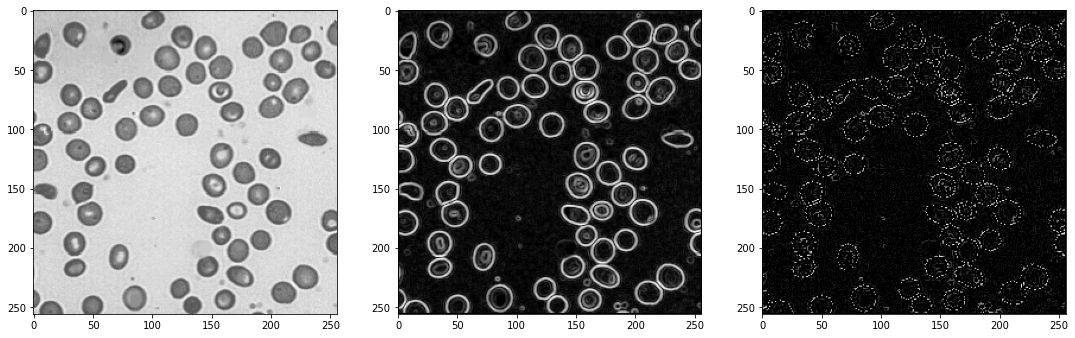

In [ ]:
plot_images(grayscale_image, filtered_image, nms_image, True)

In [ ]:
plt.get_cmap("gray")